 iteration is: 0  and loss function is: 384.0
 iteration is: 20  and loss function is: 56.0
 iteration is: 40  and loss function is: 54.0
 iteration is: 60  and loss function is: 49.0
 iteration is: 80  and loss function is: 53.0
 iteration is: 100  and loss function is: 51.0
 iteration is: 120  and loss function is: 62.0
 iteration is: 140  and loss function is: 63.0
 iteration is: 160  and loss function is: 54.0
 iteration is: 180  and loss function is: 55.0
 iteration is: 200  and loss function is: 52.0
 iteration is: 220  and loss function is: 53.0
 iteration is: 240  and loss function is: 54.0
 iteration is: 260  and loss function is: 52.0
 iteration is: 280  and loss function is: 52.0
 iteration is: 300  and loss function is: 106.0
 iteration is: 320  and loss function is: 52.0
 iteration is: 340  and loss function is: 54.0
 iteration is: 360  and loss function is: 160.0
 iteration is: 380  and loss function is: 51.0
 iteration is: 400  and loss function is: 54.0
 iteration is: 4

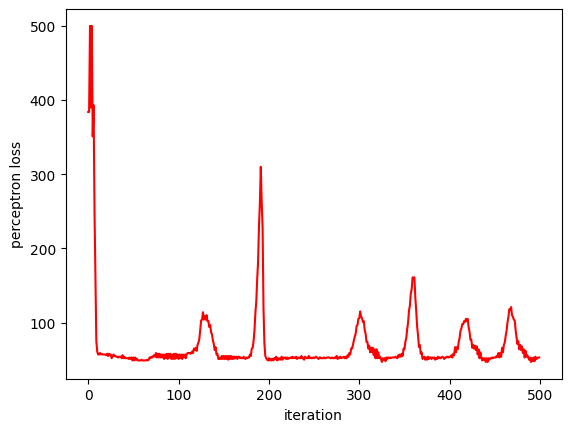

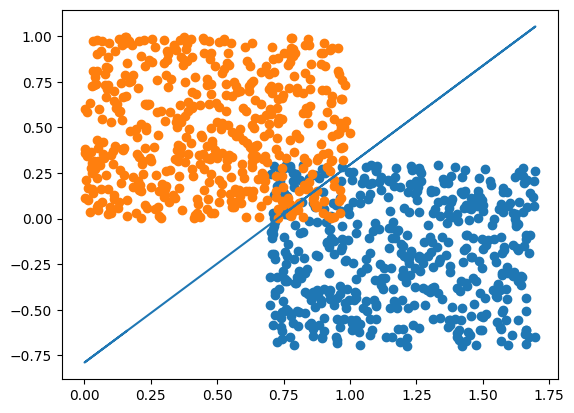

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
def sign_activation(z):
    return np.sign(z)
def perceptron_gradient(X, y, theta, learning_rate, iterations,X_plot,anti_overfitting_factor):
    # m = len(y)
    jj=0
    loss_fun=np.full((iterations,),np.nan)
    theta_sequence=np.full((len(theta),iterations),np.nan)
    predictions = sign_activation(X.dot(theta))
    a=np.where(predictions != y)
    while((len(a[0])>anti_overfitting_factor*len(y) and jj<iterations)):
      # plt.close('all')
      loss_fun[jj]=len(a[0])
      predictions = sign_activation(X.dot(theta))
      a=np.where(predictions != y)
      XX=X.T
      XXX=np.zeros(np.shape(theta))
      for j in a[0]:
        XXX=XXX+np.reshape((XX[:,j]*y[j]),np.shape(theta))
      theta = theta + learning_rate * XXX
      theta_sequence[:,jj] = theta[:,0]
      if (jj%20 == 0):
        print(' iteration is:',jj,' and loss function is:',loss_fun[jj])
      jj=jj+1
      # plt.figure()
      # a=np.where((y>0)*1)
      # b=np.where((y<0)*1)
      # plt.scatter(X_plot[a[0],0], X_plot[a[0],1])
      # plt.scatter(X_plot[b[0],0], X_plot[b[0],1])
      # plt.plot(X_plot[:,0],-1/(theta[2,0])* (theta[0,0]+theta[1,0]*X_plot[:,0]))
      # plt.show()
      # time.sleep(0.01)
      # plt.close()
    return loss_fun,theta,theta_sequence
# تولید داده‌ها
N_samples = 1000
data_dimension = 10
X = np.random.rand(N_samples, data_dimension)
X[0:int(np.shape(X)[0]/2),0]=X[0:int(np.shape(X)[0]/2),0]+0.7
X[0:int(np.shape(X)[0]/2),1]=X[0:int(np.shape(X)[0]/2),1]-0.7
X_b = np.c_[np.ones((N_samples, 1)), X]
y=np.zeros((N_samples, 1))
for i in range(0,np.shape(X)[0]):
  if i<np.shape(X)[0]/2:
    y[i,0]=1
  else:
    y[i,0]=-1
# X = 2 * np.random.rand(N_samples, 2)
# y = 2 * (X[:, 0] + X[:, 1] > 1) - 1
a=np.random.permutation(N_samples)
X_b=X_b[a,:]
X=X[a,:]
y=y[a,:]
theta = np.random.randn(data_dimension+1, 1)
# تعیین پارامترهای آموزش
learning_rate = 0.01
iterations = 500
anti_overfitting_factor=0.01
# اعمال الگوریتم گرادیان نزولی
loss_fun,theta,theta_sequence = perceptron_gradient(X_b, y, theta, learning_rate, iterations,X,anti_overfitting_factor)
index = np.where(loss_fun==np.min(loss_fun))
index = index[-1][-1]
theta =np.reshape(theta_sequence[:,index],np.shape(theta))

# چاپ پارامترها
print("Parameters (theta):")
print(theta)
# نمودار تغییرات تابع هزینه در طول گرادیان نزولی
plt.plot(range(iterations), loss_fun, 'r')
plt.xlabel('iteration')
plt.ylabel('perceptron loss')
plt.show()

plt.figure()
a=np.where((y>0)*1)
b=np.where((y<0)*1)
plt.scatter(X[a[0],0], X[a[0],1])
plt.scatter(X[b[0],0], X[b[0],1])
plt.plot(X[:,0],-1/(theta[2,0])* (theta[0,0]+theta[1,0]*X[:,0]))
# plt.plot(X[:,0],-1/(theta[2,iterations-1])* (theta[0,iterations-1]+theta[1,iterations-1]*X[:,0]))